<a href="https://colab.research.google.com/github/TaeangLim/First/blob/main/EDA_to_Prediction(DieTanic)_Study1/211229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA TO Prediction (DieTanic)

sometimes life gas a cruel sense of humor, giving you the thing you always wanted at the worst time possible.

# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
#matplotlib inline

In [2]:
data=pd.read_csv('drive/MyDrive/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked have null values. I will try to fix them

### How many Survived?

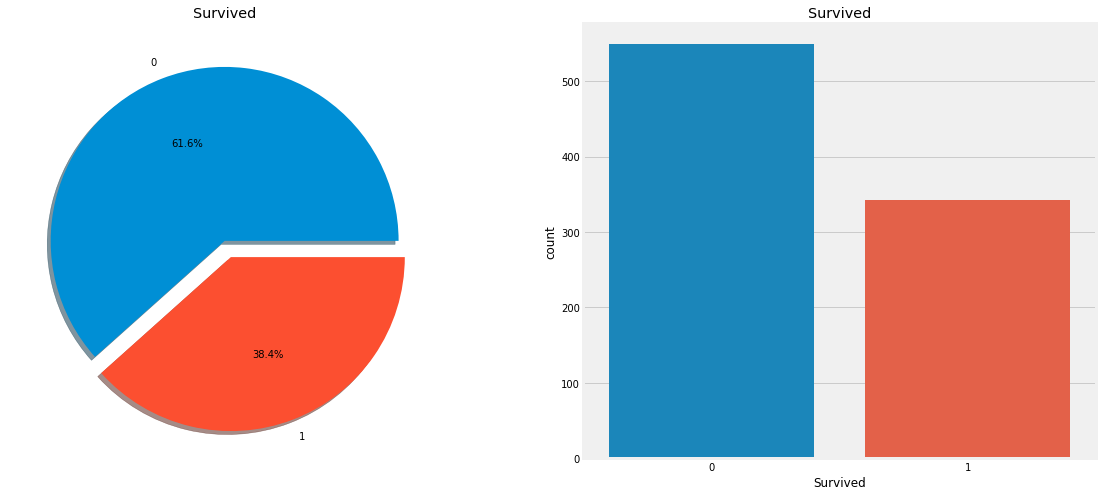

In [5]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not may passengers survived the accident.

Out of 891 passengers in training set, only around 350 survivied e.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Part Of Embarcation, Age, etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical Variable is one that has two or more categories and each value in that feature cna be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such cariables.They are als known as Nominnal Variables.

Categorical Features in the dataset:Sex, Embarked.

### Ordinal Features:
An ordinal variales is similar to categorial values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we gave a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we  can have a relative sor in the variable.

Ordinal Features in the dataset:PClass

### Continous Feature:
A feature is said to be continous if it can take values between any two points or betwee the minimum or amximum values in the features column.

Continoues Features in the dataset:Age

## Analysing The Features

### Sex -> Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

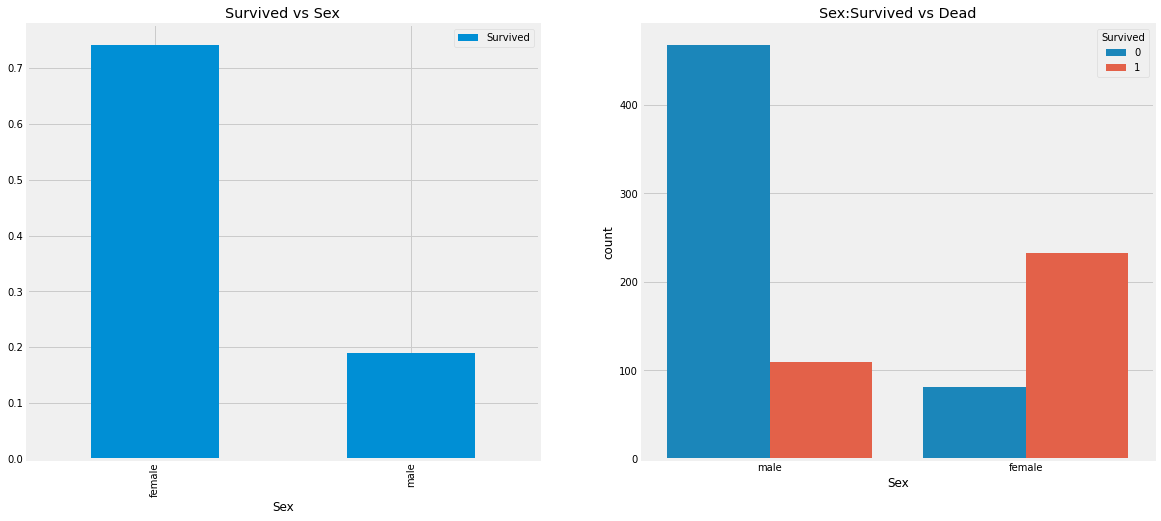

In [7]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very imortant feature for modeling. But is it the best?? Lets check other features.

### Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


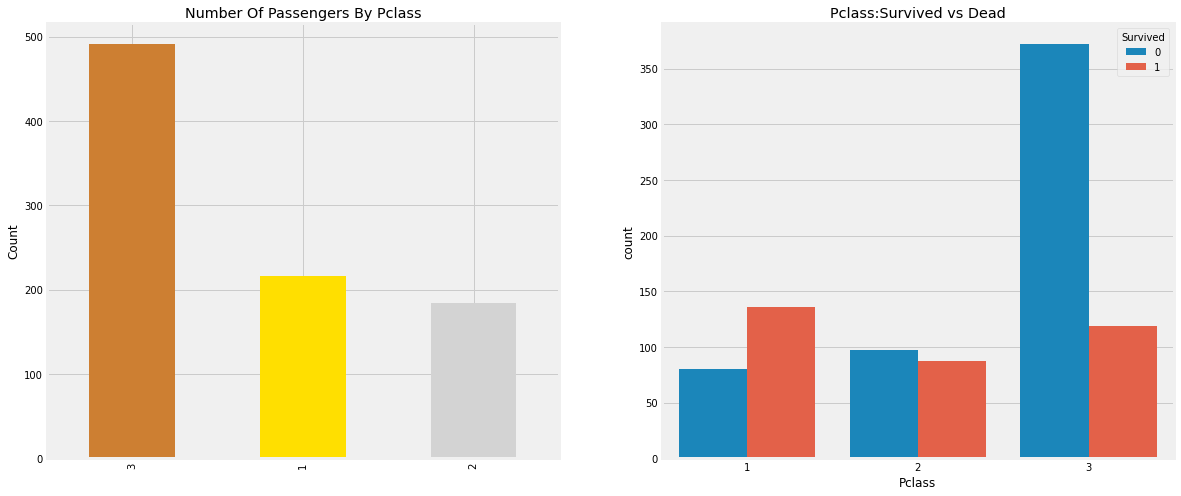

In [9]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data.Pclass.value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survivval rate with Sex and Pclass Together.

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

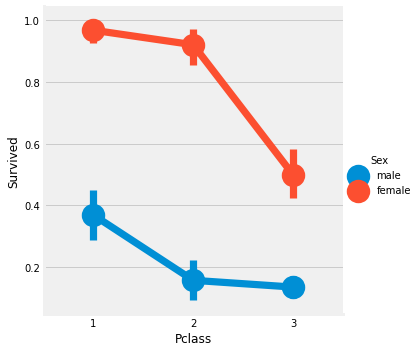

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex',data=data)
plt.show()

We ues FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women froma Pcalss 1 is about 95-96%, as only 3 out of 94 from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate. 

Looks like Pclass is also an important feature. Lets analyse other features.

### Age -> Continous Feature

In [12]:
print('Oldest Passenger was of:',data.Age.max(), 'Years')
print('Youngest Passenger was of:',data.Age.min(), 'Years')
print('Average Age on the ship:',data.Age.mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


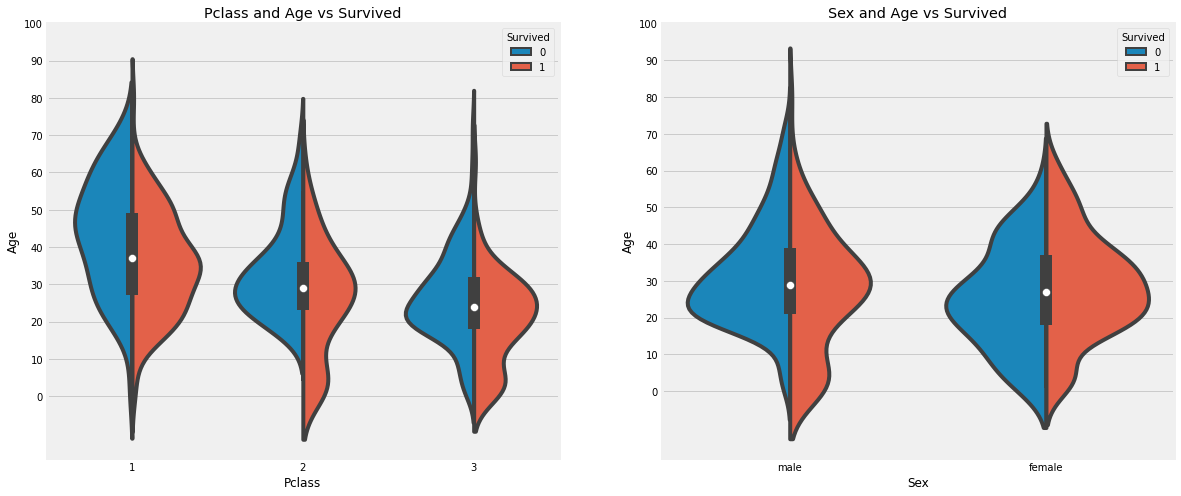

In [13]:
f, ax= plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age', hue='Survived',data=data, split= True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observation:

1)The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survived chances for Passnegers aged 20-50 from Pclass 1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace t hese NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just assign a  4 year kid with the mean age that is 29 years. Is there any way to find out what age-band dose the passenger lie?

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr an Mrs to the respective groups.

### "What's In A Name??" --> Feature :P

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

Okay so here we are using the Regex:[A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # checking the Initial with Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NaN Ages

In [18]:
data.loc[(data.Age.isnull())& (data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())& (data.Initial=='Mrs'), 'Age']= 35.981818
data.loc[(data.Age.isnull())& (data.Initial=='Miss'), 'Age']=21.860000
data.loc[(data.Age.isnull())& (data.Initial=='Master'), 'Age']=4.574167
data.loc[(data.Age.isnull())& (data.Initial=='Other'), 'Age']=45.888889


In [19]:
data.Age.isnull().any()

False

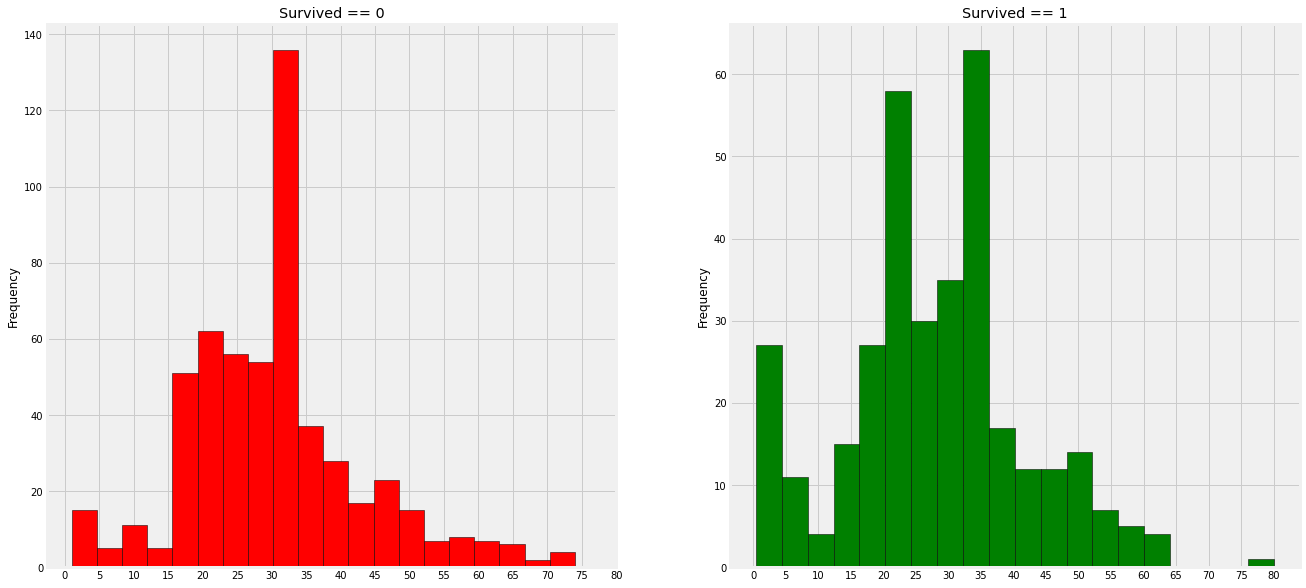

In [20]:
f, ax= plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived == 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived == 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observation:

1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2) The oldest Passenger was saved(80 years).

3) Maximum number of deaths were in the age group of 30-40.

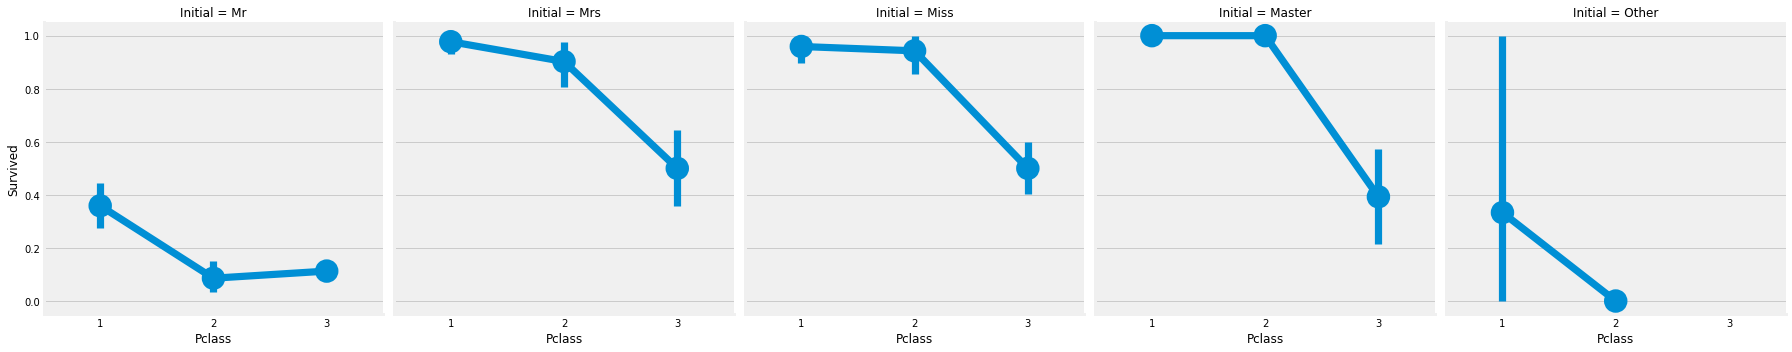

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Embarked -> Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation

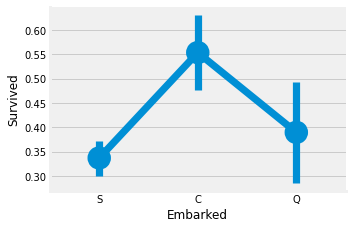

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival Port C is highest around 0.55 while it is lowest for S.

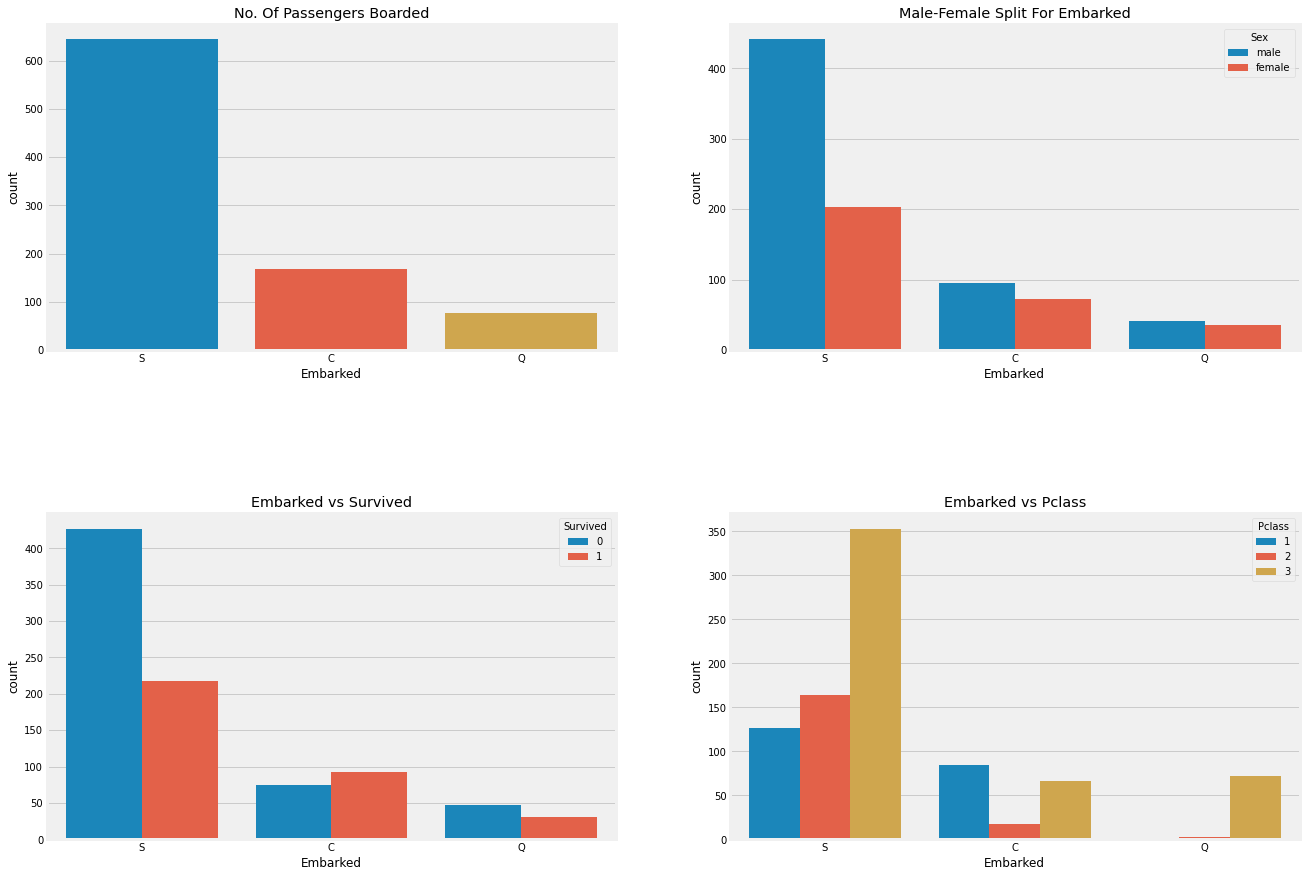

In [24]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split For Embarked')
sns.countplot('Embarked',hue='Survived',data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Observation:

1)Maximum passengers boarded from s. Majority of them being from Pclass 3.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and Pclass 2 Passnegers.

3) The Embark S looks to the part from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass 3 around 81% didn't survive.

4) Port Q had almost 95% of the passengers were from Pclass 3.

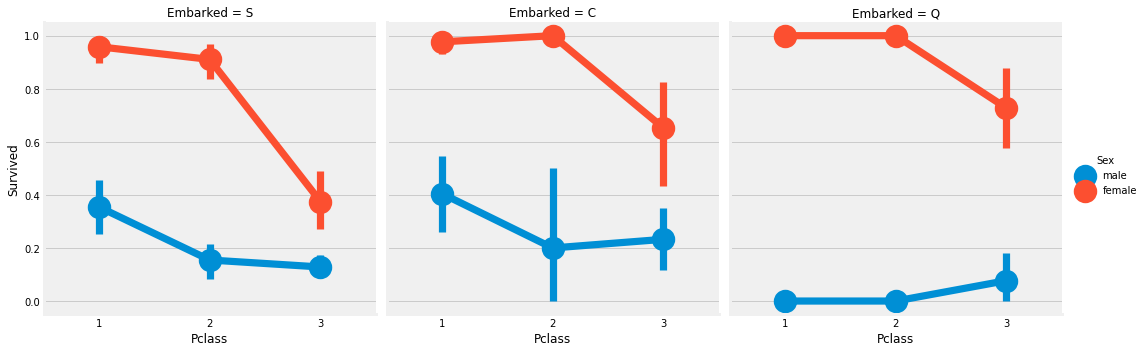

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

Observation:

1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass. 

2) Port S looks to be very unlucky for Pclass 3 Passengers as the survival rate for both men and women is very low. (Money Matters)

3) Port Q looks to be unlukiest for Men, as almost all were from Pclass 3.

Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [26]:
data['Embarked'].fillna('S', inplace= True)

In [27]:
data.Embarked.isnull().any() #Finally No NaN values

False

### SibSip -> Disvrete Feature
This feature represents whether a person is alone or wiht his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


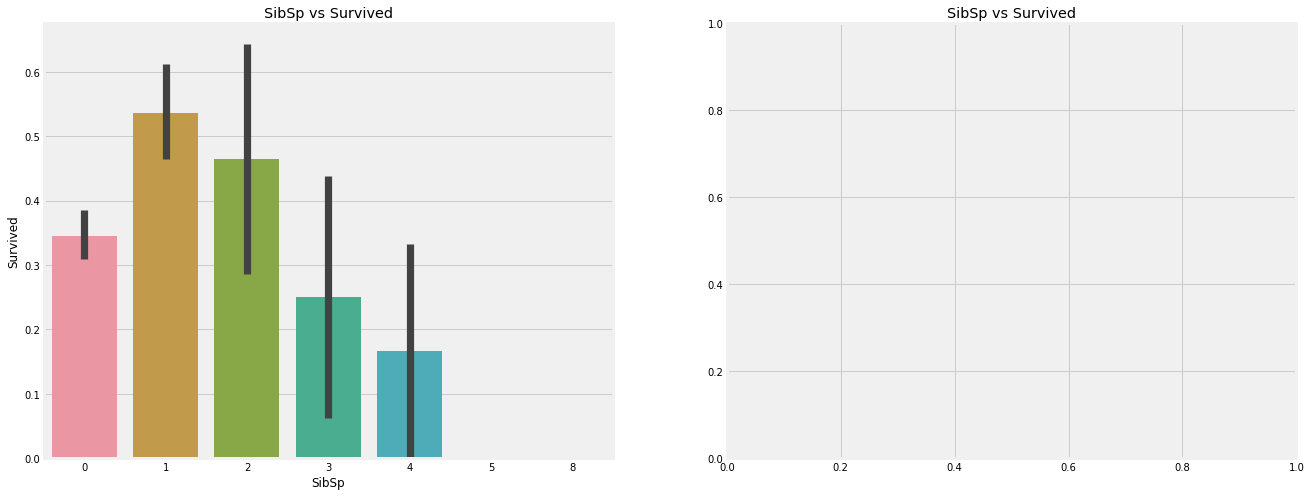

In [29]:
f, ax=plt.subplots(1,2 ,figsize =(20,8))
sns.barplot('SibSp','Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observation:

The barplot and factorplot shows that if a passneger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly devreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may ne Pclass??

The reason is Pclass. The crosstab shows that Person with SipSb>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

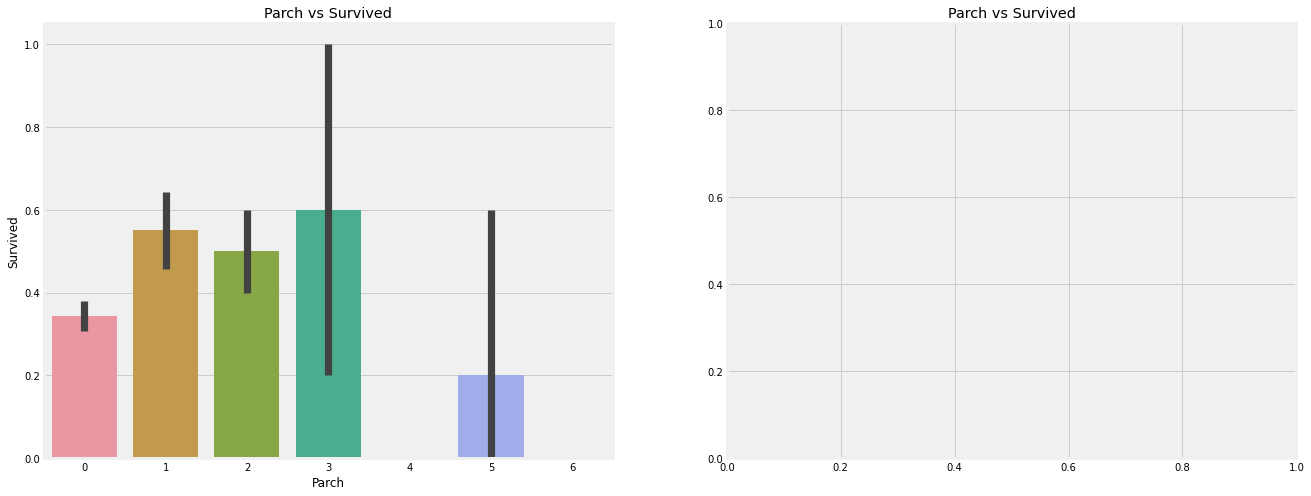

In [32]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

OBservation:

Gere too the result are quite similar. Passnegers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also provs to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Fare -> Continous Feature

In [33]:
print('Highest Fare were:', data['Fare'].max())
print('Lowest Fare were:', data['Fare'].min())
print('Average Fare were:', data['Fare'].mean())

Highest Fare were: 512.3292
Lowest Fare were: 0.0
Average Fare were: 32.2042079685746


The lowest fare is 0.0. Wow!! a free luxorious ride.

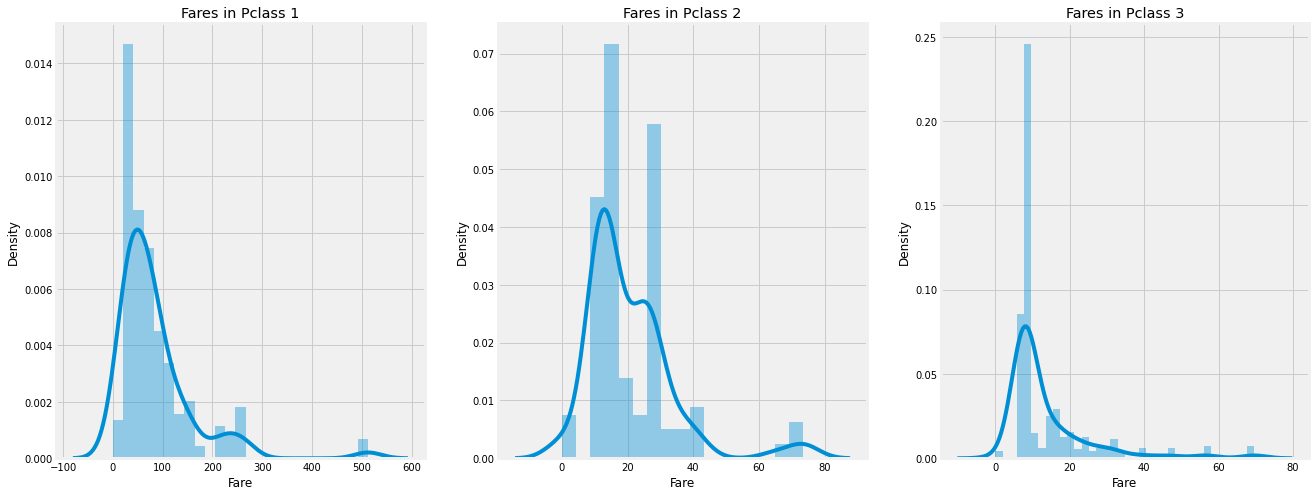

In [34]:
f, ax= plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to ba a large distribution in the fares of Passengers in Pclass1 and this distribution gose on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

### Observation in a Nutshell for all features:
Sex:The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class Passenger gives you better chances of survival.. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass 1 is almost 1 and is high too for those from Pclass2. Money Wins!!!

Age: Children less than 5-10 years do have a high chance of suvival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass 1 passengers got up at S. Passengers at Q were all from Pclass 3.

Parch+SibSp:Having 1-2 siblings, spouse on borad or 1-3 Parents shows a greater chance of probablity rather than being alone of having a large family travelling with you.

## Correlation Between The Features

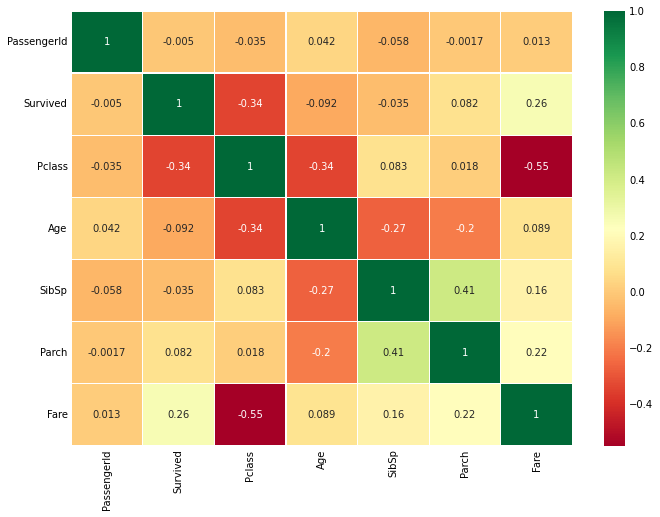

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #data.corr() --> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we annot correlate between alphabets or strings. Before understanding the plot, let us see wwhat exactly correlation is.

POSIRIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect correlation.

NEVATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A values -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the feaures are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant.While making oro training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There many redundant features which should be eliminated. Also we can get or add new feature by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will transfrom the existing relevant features to suitable from for Predictive Modeling.

## Age_band

### Problem With Age Feature:
As I have mentioned earlier that Age is a continous feature, there is a problem with COntinous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports  Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value. 

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[(data['Age']>64), 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') #checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


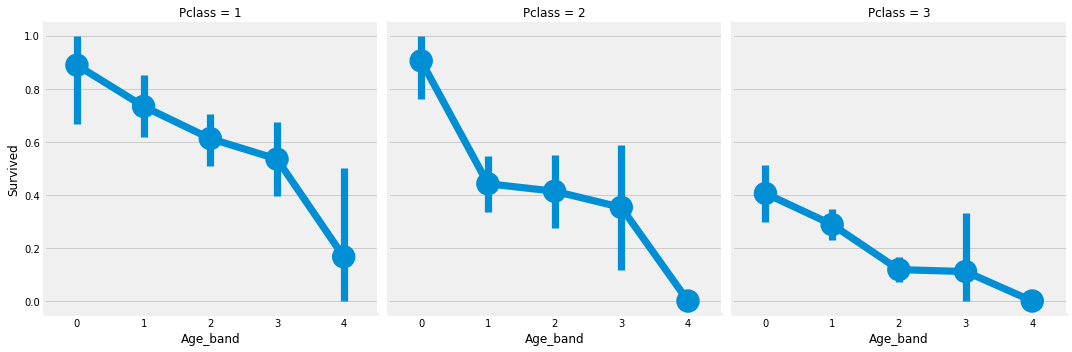

In [38]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

True that ... the survival rate decreases as the age increases irrespective of the Pclass.

## Family_Size and Alone
At this point, we can create a new feature called 'Family_size' and 'Alone' and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] #family size
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 #Alone

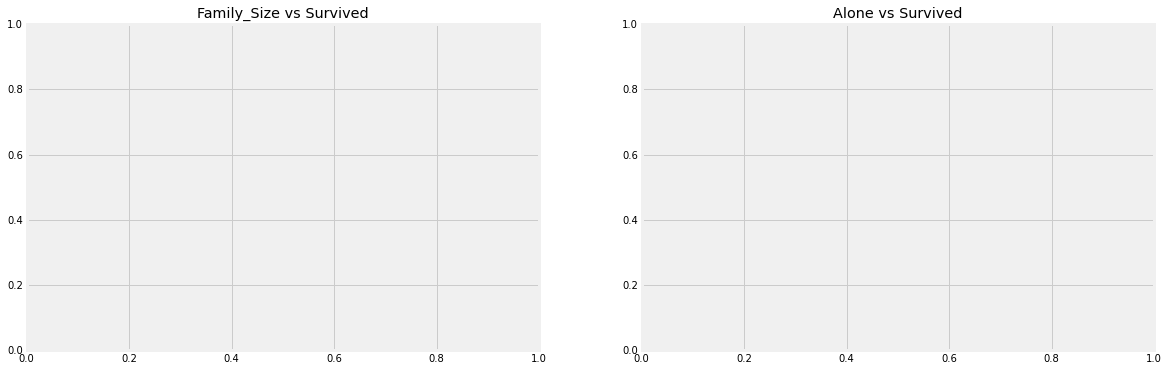

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0 means that the passenger is alone. Clearly, if you are alone or family_size=0, then chances for survival is very low. For family size > 4, the chances decrease too. This is also looks to be an important feature for the model. Lets examine this further. 

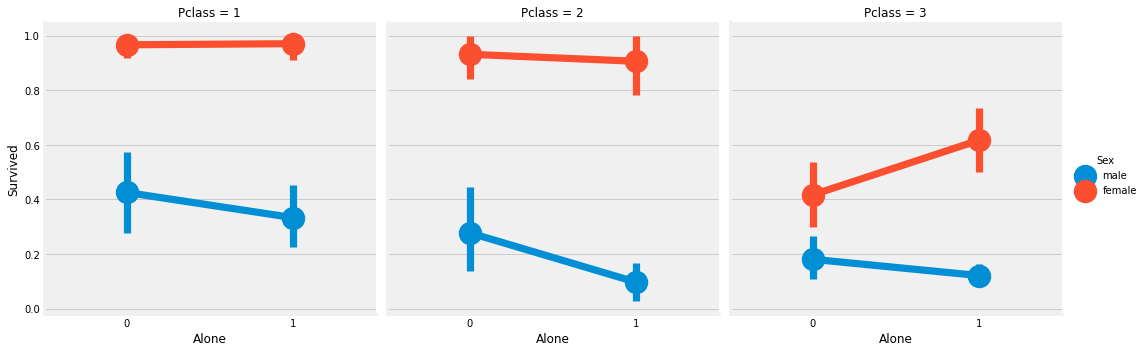

In [41]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex of Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

## Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut dose is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can elearly see that as the fare_range increases, the chances of survival incereases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

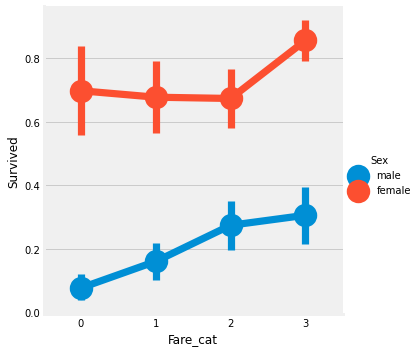

In [44]:
sns.factorplot('Fare_cat', 'Survived',data=data, hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

## Converting String Values into Numeric
since we cannot pass string to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [45]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

### Dropping UnNeeded Features
Name -> We don't need name feature as it cannot be conberted into any categorical value.

Age -> We have the Age_band feature, so no need of this.

Ticket -> It is any random string that cannot be categorised.

Fare -> We hav the Fare_cat feature, so unneeded

Cabin -> A lot of NaN values and also many passengers have multiple cabins. So this is a unless feature.

Fare_Range -> we have the fare_cat feature.

PassengerId -> Cannot be categorised.

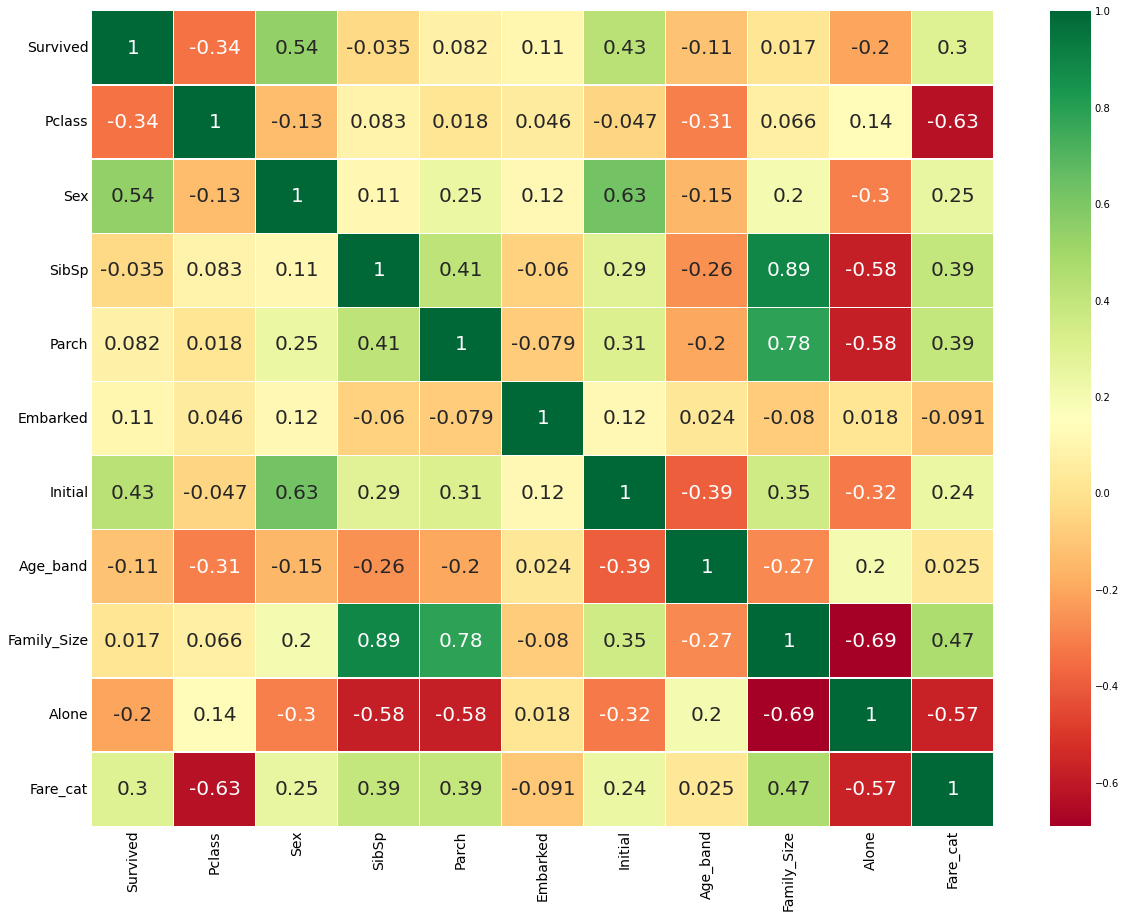

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being SibSp and Family_Size and Parch and Family_size and some negative ones like Alone and Family_Size.

# Part3:Predictive Modeling
we have gained some insight from the EDA part. But with that, we cannot accurately predict or tell wheather a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model:

1) Logistic Regression

2) Support Vector Machines (LInear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [47]:
#import all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm #support vector machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix